In [1]:
""" For alpha=0.2 and n_experiments=200 realizations of daily returns of the risky asset this notebook 
(1) computes optimal portfolios, usiong the bisection method
(2) evaluates true utilities of these portfolios, usinng a large sample 
(3) computes histograms in Fig.1-3 of the paper
"""
import numpy as np
from scipy  import optimize

In [2]:
# nu is the weignt of the risky asset
def gb(nu,r):
    """ The derivative of the relative power utility """
    z1=1+nu*(r-1)
    z2=np.fmax(r,1)
    return np.mean((z1/z2)**(alpha-1)*(r-1)/z2)

In [3]:
import random
# N is the sample length
n0=252*10
n1=252*10**2
n2=252*10**3
# r: returns of the risky asset
r0=np.ones(n0)
r1=np.ones(n1)
r2=np.ones(n2)
# Parameters of the discrete Black-Scholes model
mu=0.15
sigma=0.45
print(mu,sigma)
print(np.exp(mu))
print((mu-sigma**2/2)/252,sigma/np.sqrt(252))

0.15 0.45
1.161834242728283
0.0001934523809523809 0.028347335475692043


In [4]:
# n_experiments is the number of realizations
n_experiments=200
# w_bis, wb_bis are the arrays for the optimal weights for the ordinary and relative power utilities
wb_bis_0=np.zeros(n_experiments)
wb_bis_1=np.zeros(n_experiments)
wb_bis_2=np.zeros(n_experiments)

In [5]:
w_al=[]
wb_al=[]
alpha=0.2
for s in range(n_experiments):
    np.random.seed(42+s) 
    # returns of the risky asset
    r0=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=n0) 
    # The bisection method optimize.bisect for the derivatives of the empirical utilities with initial sign check
    if gb(0,r0)<=0 and gb(1,r0)<=0:
        root_0=0
    elif gb(0,r0)>=0 and gb(1,r0)>=0:
        root_0=1
    else: 
        root_0=optimize.bisect(gb,0,1,args=(r0)) 
    wb_bis_0[s]=root_0
    print(s)
for s in range(n_experiments):
    np.random.seed(42+s) 
    # returns of the risky asset
    r1=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=n1) 
    # The bisection method optimize.bisect for the derivatives of the empirical utilities with initial sign check
    if gb(0,r1)<=0 and gb(1,r1)<=0:
        root_1=0
    elif gb(0,r1)>=0 and gb(1,r1)>=0:
        root_1=1
    else: 
        root_1=optimize.bisect(gb,0,1,args=(r1)) 
    wb_bis_1[s]=root_1
    print(s)
for s in range(n_experiments):
    np.random.seed(42+s) 
    # returns of the risky asset
    r2=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=n2) 
    # The bisection method optimize.bisect for the derivatives of the empirical utilities with initial sign check
    if gb(0,r2)<=0 and gb(1,r2)<=0:
        root_1=0
    elif gb(0,r1)>=0 and gb(1,r2)>=0:
        root_2=1
    else: 
        root_2=optimize.bisect(gb,0,1,args=(r2)) 
    wb_bis_2[s]=root_2
    print(s)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104


In [6]:
def U_gr(nu,r):
    """ Power utility minus its value at zero
    """
    # r: the array of the risky asset returns
    z=((1+nu*(r-1))/np.fmax(r,1))**alpha-(1/np.fmax(r,1))**alpha
    return np.mean(z)

In [7]:
# A very large sample for the evaluation of the true utility
U_opt_0=np.zeros(n_experiments)
U_opt_1=np.zeros(n_experiments)
U_opt_2=np.zeros(n_experiments)
N=10**7
np.random.seed(1000) 
r=np.random.lognormal(mean=(mu-sigma**2/2)/252, sigma=sigma/np.sqrt(252), size=N)
# Evaluation of true utilities of optimal portfolio weights
for i in range(n_experiments):
    U_opt_0[i]=U_gr(wb_bis_0[i],r)*10**4
    U_opt_1[i]=U_gr(wb_bis_1[i],r)*10**4
    U_opt_2[i]=U_gr(wb_bis_2[i],r)*10**4
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


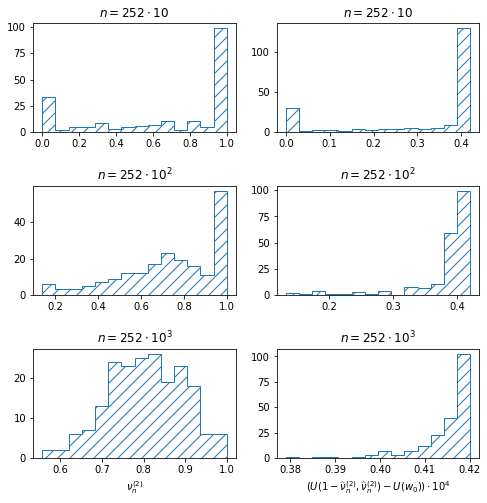

In [9]:
import matplotlib.pyplot as plt
# Histograms of the true utilities for 3 variants of price histories
fig, axes = plt.subplots(3, 2, figsize=(8,8))
fig.subplots_adjust(hspace=0.5, wspace=0.2)
axes[0,0].hist(wb_bis_0,bins=14,histtype='step',hatch='//') 
axes[0,0].set_title(r'$n=252\cdot 10$')
axes[0,1].hist(U_opt_0,bins=14,histtype='step',hatch='//') 
axes[0,1].set_title(r'$n=252\cdot 10$')
axes[1,0].hist(wb_bis_1,bins=14,histtype='step',hatch='//')
axes[1,0].set_title(r'$n=252\cdot 10^2$')
axes[1,1].hist(U_opt_1,bins=14,histtype='step',hatch='//') 
axes[1,1].set_title(r'$n=252\cdot 10^2$')
axes[2,0].hist(wb_bis_2,bins=14,histtype='step',hatch='//')
axes[2,0].set_title(r'$n=252\cdot 10^3$')
axes[2,0].set_xlabel(r'$\nu_n^{(2)}$')
axes[2,1].hist(U_opt_2,bins=14,histtype='step',hatch='//') 
axes[2,1].set_title(r'$n=252\cdot 10^3$')
axes[2,1].set_xlabel(r'$(U(1-\widehat\nu_n^{(2)},\widehat\nu_n^{(2)})-U(w_0))\cdot 10^4$')
fig.savefig('one_risky_hist.eps', dpi=400, bbox_inches='tight')
fig.savefig('one_risky_hist.png', dpi=400, bbox_inches='tight')